#Computer Vision

#CNN for CIFAR10

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

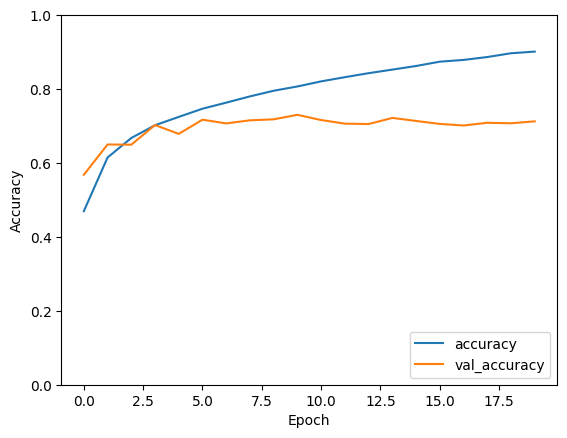

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Class names corresponding to the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display the class names
print("Class Names:")
for i in range(10):
    print(f"{i}: {class_names[i]}")

Class Names:
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck


In [ ]:
import requests
import os

# URL of the image you want to download
image_url = "https://www.birds.cornell.edu/home/wp-content/uploads/2023/09/334289821-Baltimore_Oriole-Matthew_Plante.jpg"

# Directory path where you want to save the image
save_dir = '/content/img'
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Filename for the saved image (extracted from the URL)
image_filename = os.path.join(save_dir, os.path.basename(image_url))

# Send a GET request to the image URL
response = requests.get(image_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open the file in binary write mode and save the image content
    with open(image_filename, 'wb') as f:
        f.write(response.content)
    print(f"Image downloaded successfully and saved as: {image_filename}")
else:
    print("Failed to download image")


Image downloaded successfully and saved as: /content/img/334289821-Baltimore_Oriole-Matthew_Plante.jpg


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Define the class names corresponding to CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Path to the downloaded image file
image_path = '/content/img/334289821-Baltimore_Oriole-Matthew_Plante.jpg'  # Provide the path to your downloaded image

# Load the image using Keras' image.load_img function
img = image.load_img(image_path, target_size=(32, 32))  # Resize image to match input size of your model
img_array = image.img_to_array(img)  # Convert PIL image to numpy array
img_array = img_array / 255.0  # Normalize pixel values

# Add a batch dimension and preprocess the image for prediction
img_input = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_input)

# Get predicted class index (highest probability)
predicted_class_index = np.argmax(predictions[0])

# Get predicted class label
predicted_class = class_names[predicted_class_index]

# Display the predicted class
print(f"Predicted Class: {predicted_class}")

1/1 [==============================] - 0s 193ms/step
Predicted Class: bird
